In [9]:
# reading json file using pandas
#intents2 = pd.read_json("intents.json")
#intents2

In [10]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tflearn
import random
import nltk
import warnings
warnings.filterwarnings("ignore")


Instructions for updating:
non-resource variables are not supported in the long term


In [11]:
import json

with open("intents.json") as f:
    intents = json.load(f)
intents


{'intents': [{'tag': 'greeting',
   'patterns': ['Hi', 'How are you', 'Is anyone there?', 'Hello', 'Good day'],
   'responses': ['Hello, thanks for visiting',
    'Good to see you again',
    'Hi there, how can I help?'],
   'context_set': ''},
  {'tag': 'goodbye',
   'patterns': ['Bye', 'See you later', 'Goodbye'],
   'responses': ['See you later, thanks for visiting',
    'Have a nice day',
    'Bye! Come back again soon.']},
  {'tag': 'thanks',
   'patterns': ['Thanks', 'Thank you', "That's helpful"],
   'responses': ['Happy to help!', 'Any time!', 'My pleasure']},
  {'tag': 'hours',
   'patterns': ['What hours are you open?',
    'What are your hours?',
    'When are you open?'],
   'responses': ["We're open every day 9am-9pm",
    'Our hours are 9am-9pm every day']},
  {'tag': 'mopeds',
   'patterns': ['Which mopeds do you have?',
    'What kinds of mopeds are there?',
    'What do you rent?'],
   'responses': ['We rent Yamaha, Piaggio and Vespa mopeds',
    'We have Piaggio, Vesp

In [12]:
words = []
labels = []
documents = []
ignore = ['?']

for i in intents["intents"]:
    for sentence in i["patterns"]:
        
        token = nltk.word_tokenize(sentence)  # applying tokenization
        
        words.extend(token)
        documents.append((token,i['tag']))
        
        if i['tag'] not in labels:
            labels.append(i['tag'])
            

In [13]:
from nltk.stem.lancaster import LancasterStemmer

stemmer = LancasterStemmer()  # stemming
words = [stemmer.stem(w.lower()) for w in words if w not in ignore]
words = sorted(list(set(words)))
print(len(words))
words

48


["'d",
 "'s",
 'a',
 'acceiv',
 'anyon',
 'ar',
 'bye',
 'can',
 'card',
 'cash',
 'credit',
 'day',
 'do',
 'doe',
 'good',
 'goodby',
 'hav',
 'hello',
 'help',
 'hi',
 'hour',
 'how',
 'i',
 'is',
 'kind',
 'lat',
 'lik',
 'mastercard',
 'mop',
 'of',
 'on',
 'op',
 'rent',
 'see',
 'tak',
 'thank',
 'that',
 'ther',
 'thi',
 'to',
 'today',
 'we',
 'what',
 'when',
 'which',
 'work',
 'yo',
 'you']

In [14]:
labels = sorted(list(set(labels)))

In [15]:
train = []
output = []
output_empty = [0] * len(labels)

for doc in documents:
    bag_of_words = []
    pattern = doc[0]
    stem_words = [stemmer.stem(w.lower()) for w in pattern]
    for w in words:
        bag_of_words.append(1) if w in stem_words else bag_of_words.append(0)

    output_row = list(output_empty)
    output_row[labels.index(doc[1])] = 1

    train.append([bag_of_words, output_row])
print(train)

[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 1, 0, 0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [16]:
random.shuffle(train)
print(type(train))
train = np.array(train)
print(type(train))

<class 'list'>
<class 'numpy.ndarray'>


In [17]:
x = train[:,0]
y = train[:,1]

In [18]:
#x1 = x.reshape(1,27)
x1 = np.array(x.tolist())
print(x1.shape)
x1[0]

(27, 48)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [19]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

y1 = np.array(y.tolist())
y1.shape

(27, 9)

In [20]:
num_labels = y1.shape[1]
num_labels

9

In [21]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation

In [22]:
model = Sequential()
model.add(Dense(100,input_shape=(48,),activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(100,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(100,activation="relu"))
model.add(Dense(num_labels,activation="softmax"))

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               4900      
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 9)                 909       
                                                                 
Total params: 26,009
Trainable params: 26,009
Non-trai

In [24]:
model.compile(loss="categorical_crossentropy",metrics=["accuracy"],optimizer='adam')

In [25]:
model.fit(x1,y1,batch_size=32,epochs=200)

Train on 27 samples
Epoch 1/200
27/27 [==============================] - 0s 4ms/sample - loss: 2.2320 - acc: 0.0000e+00
Epoch 2/200
27/27 [==============================] - 0s 189us/sample - loss: 2.1750 - acc: 0.2222
Epoch 3/200
27/27 [==============================] - 0s 176us/sample - loss: 2.1566 - acc: 0.1852
Epoch 4/200
27/27 [==============================] - 0s 231us/sample - loss: 2.1493 - acc: 0.2593
Epoch 5/200
27/27 [==============================] - 0s 174us/sample - loss: 2.1820 - acc: 0.0370
Epoch 6/200
27/27 [==============================] - 0s 283us/sample - loss: 2.1553 - acc: 0.1852
Epoch 7/200
27/27 [==============================] - 0s 210us/sample - loss: 2.1445 - acc: 0.2593
Epoch 8/200
27/27 [==============================] - 0s 189us/sample - loss: 2.1559 - acc: 0.2222
Epoch 9/200


2023-12-20 12:04:29.600214: W tensorflow/c/c_api.cc:300] Operation '{name:'training/Adam/dense_4/bias/v/Assign' id:431 op device:{requested: '', assigned: ''} def:{{{node training/Adam/dense_4/bias/v/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training/Adam/dense_4/bias/v, training/Adam/dense_4/bias/v/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


27/27 [==============================] - 0s 169us/sample - loss: 2.1576 - acc: 0.1481
Epoch 10/200
27/27 [==============================] - 0s 229us/sample - loss: 2.0570 - acc: 0.4074
Epoch 11/200
27/27 [==============================] - 0s 169us/sample - loss: 2.1009 - acc: 0.2222
Epoch 12/200
27/27 [==============================] - 0s 230us/sample - loss: 2.0868 - acc: 0.2222
Epoch 13/200
27/27 [==============================] - 0s 241us/sample - loss: 2.1089 - acc: 0.2593
Epoch 14/200
27/27 [==============================] - 0s 157us/sample - loss: 2.1153 - acc: 0.2222
Epoch 15/200
27/27 [==============================] - 0s 225us/sample - loss: 2.0825 - acc: 0.1481
Epoch 16/200
27/27 [==============================] - 0s 190us/sample - loss: 2.0672 - acc: 0.2963
Epoch 17/200
27/27 [==============================] - 0s 255us/sample - loss: 2.0689 - acc: 0.4074
Epoch 18/200
27/27 [==============================] - 0s 216us/sample - loss: 2.0095 - acc: 0.3704
Epoch 19/200
27/27 [===

27/27 [==============================] - 0s 201us/sample - loss: 0.1463 - acc: 0.9630
Epoch 174/200
27/27 [==============================] - 0s 223us/sample - loss: 0.1185 - acc: 1.0000
Epoch 175/200
27/27 [==============================] - 0s 175us/sample - loss: 0.1748 - acc: 0.9630
Epoch 176/200
27/27 [==============================] - 0s 250us/sample - loss: 0.2055 - acc: 0.8889
Epoch 177/200
27/27 [==============================] - 0s 221us/sample - loss: 0.1067 - acc: 1.0000
Epoch 178/200
27/27 [==============================] - 0s 267us/sample - loss: 0.1425 - acc: 1.0000
Epoch 179/200
27/27 [==============================] - 0s 242us/sample - loss: 0.1617 - acc: 0.9630
Epoch 180/200
27/27 [==============================] - 0s 232us/sample - loss: 0.2041 - acc: 0.9630
Epoch 181/200
27/27 [==============================] - 0s 263us/sample - loss: 0.1624 - acc: 1.0000
Epoch 182/200
27/27 [==============================] - 0s 238us/sample - loss: 0.1422 - acc: 0.9630
Epoch 183/200


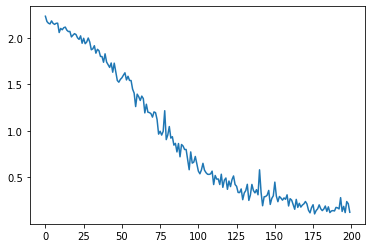

In [26]:
import matplotlib.pyplot as plt
plt.plot(model.history.history["loss"])

In [27]:
model.save("model1_100")

In [28]:
import pickle
pickle.dump({'words':words,'labels':labels,'x':x,'y':y},open('params',"wb"))

# 

In [29]:
def clean(sentence):
    token = nltk.word_tokenize(sentence)
    result = [stemmer.stem(w.lower()) for w in token]
    return result

In [30]:
def bow(user_input,words,show_details=False):
    line = clean(user_input)
    bag = [0]*len(words)
    for s in line:
        for i,w in enumerate(words):
            if s == w:
                bag[i] = 1
                #if show_details:
                 #   print("found : %s" % w)
    vector = np.array(bag)
                
    return vector.reshape(1,len(words)) 

In [31]:
threshold = 0.25

def prediction(user_input):
    prob = model.predict([bow(user_input,words)])[0]
    prob = [[i,r] for i,r in enumerate(prob) if r>threshold]
    prob.sort(key=lambda x:x[1], reverse=True)
    for i in prob:
        tag,prob = labels[i[0]],i[1]
    return tag,prob

In [38]:
def response(user_input):
    result = prediction(user_input)
    for i in intents["intents"]:
        if i["tag"] == result[0]:
            return print('Bot :',random.choice(i["responses"]))
        

In [39]:
response("see you later")

Bot : Have a nice day


In [43]:
status = True
while status:
    inp = input()
    if inp:
        print("Mercy :",inp)
        response(inp)
        
    if inp == "quit":
        print("Bot : Thanks for chatting with me")
        status = False


hi
Mercy : hi
Bot : Hi there, how can I help?
I want to rent mop today
Mercy : I want to rent mop today
Bot : We rent Yamaha, Piaggio and Vespa mopeds
can I get it today
Mercy : can I get it today
Bot : For rentals today please call 1-800-MYMOPED
when do you open
Mercy : when do you open
Bot : Our hours are 9am-9pm every day
ok thanks
Mercy : ok thanks
Bot : My pleasure
bye
Mercy : bye
Bot : See you later, thanks for visiting
quit
Mercy : quit
Bot : Bye! Come back again soon.
 Bot : Thanks for chatting with me


# 

# 

# 

# 